In [29]:
import numpy as np
import sympy as sm
import matplotlib.pyplot as plt

# 2. AS-AD model

Consider the following **AS-AD model**. The **goods market equilibrium** is given by

$$ y_{t} = -\alpha r_{t} + v_{t} $$

where $y_{t}$ is the **output gap**, $r_{t}$ is the **ex ante real interest** and $v_{t}$ is a **demand disturbance**. 

The central bank's **Taylor rule** is

$$ i_{t} = \pi_{t+1}^{e} + h \pi_{t} + b y_{t}$$

where $i_{t}$ is the **nominal interest rate**, $\pi_{t}$ is the **inflation gap**, and $\pi_{t+1}^{e}$ is the **expected inflation gap**. 

The **ex ante real interest rate** is given by 

$$ r_{t} = i_{t} - \pi_{t+1}^{e} $$

Together, the above implies that the **AD-curve** is

$$ \pi_{t} = \frac{1}{h\alpha}\left[v_{t} - (1+b\alpha)y_{t}\right]$$

Further, assume that the **short-run supply curve (SRAS)** is given by

$$ \pi_{t} = \pi_{t}^{e} + \gamma y_{t} + s_{t}$$

where $s_t$ is a **supply disturbance**.

**Inflation expectations are adaptive** and given by

$$ \pi_{t}^{e} = \phi\pi_{t-1}^{e} + (1-\phi)\pi_{t-1}$$

Together, this implies that the **SRAS-curve** can also be written as

$$ \pi_{t} = \pi_{t-1} + \gamma y_{t} - \phi\gamma y_{t-1} + s_{t} - \phi s_{t-1} $$

The **parameters** of the model are:

In [30]:
par = {}

par['alpha'] = 5.76
par['h'] = 0.5
par['b'] = 0.5
par['phi'] = 0
par['gamma'] = 0.075

**Question 1:** Use the ``sympy`` module to solve for the equilibrium values of output, $y_t$, and inflation, $\pi_t$, (where AD = SRAS) given the parameters ($\alpha$, $h$, $b$, $\alpha$, $\gamma$) and $y_{t-1}$ , $\pi_{t-1}$, $v_t$, $s_t$, and $s_{t-1}$.

In [31]:
# Importing the sympy module
import sympy as sm
sm.init_printing(use_unicode=True)

In [32]:
# Defining the variables and the parameters of the model in terms of sympy
y = sm.symbols('y_t')
pi = sm.symbols('pi_t')
y1 = sm.symbols('y_t-1')
pi1 = sm.symbols('pi_t-1')
v = sm.symbols('v_t')
s = sm.symbols('s_t')
s1 = sm.symbols('s_t-1')
gamma = sm.symbols('gamma')
alpha = sm.symbols('alpha')
h = sm.symbols('h')
b = sm.symbols('b')
phi = sm.symbols('phi')

# Defining the AD and SRAS equations in terms of the sympy variables
SRAS = pi1 + gamma*y-phi*gamma*y1+s-phi*s1
AD = 1/(h*alpha)*(v-(1+b*alpha)*y)

In [33]:
# We set SRAS equal to AS 
SRAS_AD = sm.Eq(SRAS, AD)

In [34]:
y_st = sm.solve(SRAS_AD, y)

The optimal value for y in equilibrium is:


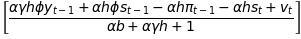

In [35]:
print(f'The optimal value for y in equilibrium is:')
y_st

We can now find the value for $\pi_t$ given the value for $y_t$

In [36]:
pi_st = 1/(h*alpha)*(v-(1+b*alpha)*y_st[0])  # we add [0] as y_t is a list with one element at index 0

The optimal value for pi in equilibrium is:


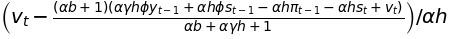

In [37]:
print(f'The optimal value for pi in equilibrium is:')
pi_st

**Question 2:** Find and illustrate the equilibrium when $y_{t-1} = \pi_{t-1} = v_t = s_t = s_{t-1} = 0$. Illustrate how the equilibrium changes when instead $v_t = 0.1$.

Firstly we turn our sympy functions into numerically functions such that we can solve for $y_t$ and $\pi_t$

In [38]:
y_num = sm.lambdify((v,alpha,b,gamma,h,phi,y1,pi1,s,s1),y_st[0])
pi_num = sm.lambdify((v,alpha,b,gamma,h,phi,y1,pi1,s,s1), pi_st)

Next, we define output and inflation as functions, $y_t$ and $\pi_t$

In [39]:
def y_func(v,y1,pi1,s,s1):
    return y_num(v,par['alpha'],par['b'],par['gamma'],par['h'],par['phi'],y1,pi1,s,s1)

def pi_func(v,y1,pi1,s,s1):
    return pi_num(v,par['alpha'],par['b'],par['gamma'],par['h'],par['phi'],y1,pi1,s,s1)

For $y_{t-1} = \pi_{t-1} = v_t = s_t = s_{t-1} = 0$ we get that $y_t$ and $\pi_t$ in equilibrium are: 

In [40]:
print(f'y in equilibrium:',y_func(v=0,y1=0,pi1=0,s=0,s1=0))
print(f'pi in equilibrium:',pi_func(v=0,y1=0,pi1=0,s=0,s1=0))

y in equilibrium: 0.0
pi in equilibrium: 0.0


For the demand shock $v_t=0.1$ we get that $y_t$ and $\pi_t$ are:

In [41]:
print(f'y when v_t=0.1:',y_func(v=0.1,y1=0,pi1=0,s=0,s1=0))
print(f'pi when v_t=0.1:',pi_func(v=0.1,y1=0,pi1=0,s=0,s1=0))

y when v_t=0.1: 0.0244140625
pi when v_t=0.1: 0.001831054687500002


To illustrate this graphically we define our AD and SRAS curves numerically 

In [42]:
def SRAS_fun(pi1,s,s1,y): 
    return pi1 + par['gamma']*y-par['phi']*par['gamma']*y1+s-par['phi']*s1

def AD_fun(v,y):
    return 1/(par['h']*par['alpha'])*(v-(1+par['b']*par['alpha'])*y)

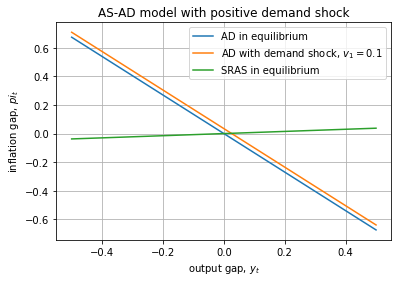

In [43]:
# Plotting the AD and SRAS curve before and after the shock
pi1 = 0 
s = 0 
s1 = 0 
v = 0 
v_shock = 0.1
y = np.linspace(-0.5,0.5,100)

AD_new = AD_fun(v,y)
AD_shock = AD_fun(v_shock,y)
SRAS_new = SRAS_fun(pi1,s,s1,y)


fig = plt.figure()
plt.axes()
ax = fig.add_subplot(1,1,1)
ax.plot(y, AD_new, label='AD in equilibrium')
ax.plot(y, AD_shock, label='AD with demand shock, $v_1=0.1$')
ax.plot(y, SRAS_new, label='SRAS in equilibrium')
ax.set_xlabel('output gap, $y_t$')
ax.set_ylabel('inflation gap, $pi_t$')
ax.set_title ('AS-AD model with positive demand shock')
ax.grid()
ax.legend();

**Persistent disturbances:** Now, additionaly, assume that both the demand and the supply disturbances are AR(1) processes

$$ v_{t} = \delta v_{t-1} + x_{t} $$
$$ s_{t} = \omega s_{t-1} + c_{t} $$

where $x_{t}$ is a **demand shock**, and $c_t$ is a **supply shock**. The **autoregressive parameters** are:

In [44]:
par['delta'] = 0.80
par['omega'] = 0.15

**Question 3:** Starting from $y_{-1} = \pi_{-1} = s_{-1} = 0$, how does the economy evolve for $x_0 = 0.1$, $x_t = 0, \forall t > 0$ and $c_t = 0, \forall t \geq 0$?

To examine the evolution of the economy after a persistent shock, $x_0=0.1$, we consider output gap and inflation gap within 100 periods.

In [45]:
# Defining the autoregressive shocks
def v_ar(v1,x):
    return par['delta']*v1+x

def s_ar(s1,c):
    return par['omega']*s1+c

# Setting initial values
T = 100
pi_vec = [0]
y_vec = [0]
s_vec = [0]
v_vec = [0]
c_vec = np.zeros(T)
x_vec = np.zeros(T)
x_vec[1] = 0.1

# Simulation
for t in range(1,T):
    s_vec.append(s_ar(s_vec[t-1],c_vec[t])) # appending the ar-process to the s-vector
    v_vec.append(v_ar(v_vec[t-1],x_vec[t])) # appending the ar-process to the v-vector

    y_vec.append(y_func(v_vec[t],y_vec[t-1],pi_vec[t-1],s_vec[t],s_vec[t-1])) # appending all vectors to output 
    pi_vec.append(pi_func(v_vec[t],y_vec[t-1],pi_vec[t-1],s_vec[t],s_vec[t-1])) # appending all vectors to inflation

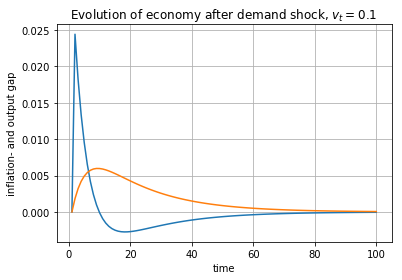

In [46]:
# Creating an empty time-vector, to be able to plot the figure:
time = np.linspace(1,T,T)

# Plotting the result
fig = plt.figure()
plt.axes()
ax = fig.add_subplot(1,1,1)
ax.plot(time, y_vec)
ax.plot(time, pi_vec)
ax.set_xlabel('time')
ax.set_ylabel('inflation- and output gap')
ax.set_title('Evolution of economy after demand shock, $v_t=0.1$')
ax.grid()

**Stochastic shocks:** Now, additionally, assume that $x_t$ and $c_t$ are stochastic and normally distributed

$$ x_{t}\sim\mathcal{N}(0,\sigma_{x}^{2}) $$
$$ c_{t}\sim\mathcal{N}(0,\sigma_{c}^{2}) $$

The **standard deviations of the shocks** are:

In [47]:
par['sigma_x'] = 3.492
par['sigma_c'] = 0.2

**Question 4:** Simulate the AS-AD model for 1,000 periods. Calculate the following five statistics:

1. Variance of $y_t$, $var(y_t)$
2. Variance of $\pi_t$, $var(\pi_t)$
3. Correlation between $y_t$ and $\pi_t$, $corr(y_t,\pi_t)$
4. Auto-correlation between $y_t$ and $y_{t-1}$, $corr(y_t,y_{t-1})$
5. Auto-correlation between $\pi_t$ and $\pi_{t-1}$, $corr(\pi_t,\pi_{t-1})$

In [48]:
np.random.seed(2608)
# Redefining time
T_stoc = 1000
pi_stoc_vec = [0]
y_stoc_vec = [0]
s_stoc_vec = [0]
v_stoc_vec = [0]
c_stoc_vec = np.random.normal(loc=0.0,scale=par['sigma_c'],size=1000)
x_stoc_vec = np.random.normal(loc=0.0,scale=par['sigma_x'],size=1000)


for t in range(1,T_stoc):
    s_stoc_vec.append(s_ar(s_stoc_vec[t-1],c_stoc_vec[t])) # appending the ar-process to the s-vector
    v_stoc_vec.append(v_ar(v_stoc_vec[t-1],x_stoc_vec[t])) # appending the ar-process to the v-vector

    y_stoc_vec.append(y_func(v_stoc_vec[t],y_stoc_vec[t-1],pi_stoc_vec[t-1],s_stoc_vec[t],s_stoc_vec[t-1])) # appending all vectors to output 
    pi_stoc_vec.append(pi_func(v_stoc_vec[t],y_stoc_vec[t-1],pi_stoc_vec[t-1],s_stoc_vec[t],s_stoc_vec[t-1])) # appending all vectors to inflation
    
    

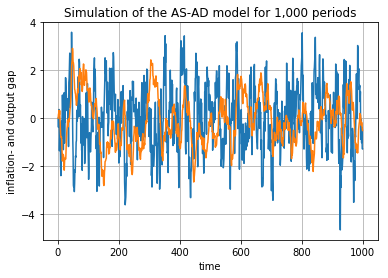

In [49]:
# Creating an empty time-vector, to be able to plot the figure:
time2 = np.linspace(1,T_stoc,T_stoc)

# Plotting the result
fig = plt.figure()
plt.axes()
ax = fig.add_subplot(1,1,1)
ax.plot(time2, y_stoc_vec)
ax.plot(time2, pi_stoc_vec)
ax.set_xlabel('time')
ax.set_ylabel('inflation- and output gap')
ax.set_title('Simulation of the AS-AD model for 1,000 periods')
ax.grid()

In [50]:
# Calculationg statistics using numpy
var_y = np.var(y_stoc_vec)
var_pi = np.var(pi_stoc_vec)
ac_pi = np.corrcoef(pi_stoc_vec[1:T_stoc],pi_stoc_vec[0:-1])
ac_y = np.corrcoef(y_stoc_vec[1:],y_stoc_vec[:-1])
corr_ypi = np.corrcoef(y_stoc_vec,pi_stoc_vec)

# Printing the result
print(f'var(y_t) = {var_y:.3f}')
print(f'var(pi_t) = {var_pi:.3f}')
# For the correlation function, numpy return a matrix of correlations of  y_t with y_t, y_t with y_t-1 etc. Hence we refer to the first number in the first line to find the correlation between the numbers 
print(f'ac(y_t) = {ac_y[0,1]:.3f}')
print(f'ac(pi_t) = {ac_pi[0,1]:.3f}')
print(f'corr(y_t,pi_t) = {corr_ypi[0,1]:.3f}')

var(y_t) = 1.833
var(pi_t) = 1.036
ac(y_t) = 0.757
ac(pi_t) = 0.975
corr(y_t,pi_t) = -0.156


**Question 5:** Plot how the correlation between $y_t$ and $\pi_t$ changes with $\phi$. Use a numerical optimizer or root finder to choose $\phi\in(0,1)$ such that the simulated correlation between $y_t$ and $\pi_t$ comes close to 0.31. 

In [ ]:
def y_func_corr(phi,v,y1,pi1,s,s1):
    return y_num(v,par['alpha'],par['b'],par['gamma'],par['h'],phi,y1,pi1,s,s1)

def pi_func_corr(phi,v,y1,pi1,s,s1):
    return pi_num(v,par['alpha'],par['b'],par['gamma'],par['h'],phi,y1,pi1,s,s1)

def v_ar(v1,x):
    return par['delta']*v1+x

def s_ar(s1,c):
    return par['omega']*s1+c

In [ ]:
# Redefining functions for output and inflaiton gap in terms of phi as a variable
def y_func_corr(phi,v,y1,pi1,s,s1):
    return y_num(v,par['alpha'],par['b'],par['gamma'],par['h'],phi,y1,pi1,s,s1)

def pi_func_corr(phi,v,y1,pi1,s,s1):
    return pi_num(v,par['alpha'],par['b'],par['gamma'],par['h'],phi,y1,pi1,s,s1)

np.random.seed(2608)
T_phi = 1000

def corr(phi):
    
    # Redefining initial values
    v_phi_vec = [0]
    s_phi_vec = [0]
    c_phi_vec = np.random.normal(loc=0.0,scale=par['sigma_c'],size=1000)
    x_phi_vec = np.random.normal(loc=0.0,scale=par['sigma_x'],size=1000)
    pi_phi_vec = [0]
    y_phi_vec = [0]
    
    for t in range(1,T_stoc):
        s_phi_vec.append(s_ar(s_phi_vec[t-1],c_phi_vec[t])) # appending the ar-process to the s-vector
        v_phi_vec.append(v_ar(v_phi_vec[t-1],x_phi_vec[t])) # appending the ar-process to the v-vector

        y_phi_vec.append(y_func_corr(phi,v_phi_vec[t],y_phi_vec[t-1],pi_phi_vec[t-1],s_phi_vec[t],s_phi_vec[t-1])) # appending all vectors to output 
        pi_phi_vec.append(pi_func_corr(phi,v_phi_vec[t],y_phi_vec[t-1],pi_phi_vec[t-1],s_phi_vec[t],s_phi_vec[t-1])) # appending all vectors to inflation
    
        corr = np.correlate(y_phi_vec,pi_phi_vec)
    
    return y_phi_vec, pi_phi_vec, corr



In [ ]:
phi_vec = np.linspace(1e-8,1,T_stoc)
print(phi_vec)

In [ ]:
plt.plot(phi_vec,corr(phi_vec))

In [ ]:
pklk

In [ ]:
# Defining phi as a vector


for x in phi_vec:
    result = corr(x)
    corr_vec.append(result)

In [ ]:
plt.figure()
plt.plot(phi_vec,corr(phi))

In [ ]:
def correlation(phi):
    
    # Setting initial values
    pi_vec_corr = [0]
    y_vec_corr = [0]

    # Simulating 
    for t in range(1,1000):
        pi_vec_corr.append(y_func_corr(phi,v_vec[t],y_vec[t-1],pi_vec[t-1],s_vec[t],s_vec[t-1]))
        y_vec_corr.append(y_func_corr(phi,v_vec[t],y_vec[t-1],pi_vec[t-1],s_vec[t],s_vec[t-1]))
        
    
    corr_matrix = np.corrcoef(pi_vec_corr,y_vec_corr)
    return corr_matrix 


phi_vec = np.linspace(1e-8,1,1000)
correlation(phi_vec)

In [ ]:
# First we plot how the correlation between inflation and output gap depend on phi.

# Redefining functions for output and inflaiton gap in terms of phi as a variable
def y_phi_func(phi,v,y1,pi1,s,s1):
    return y_num(v,par['alpha'],par['b'],par['gamma'],par['h'],phi,y1,pi1,s,s1)

def pi_phi_func(phi,v,y1,pi1,s,s1):
    return pi_num(v,par['alpha'],par['b'],par['gamma'],par['h'],phi,y1,pi1,s,s1)

# Defining initial values for the vectors needed in the simulation
def corr(phi):
    
    # Redefining initial values
    T_phi = 1000
    v_phi_vec = [0]
    s_phi_vec = [0]
    c_phi_vec = np.random.normal(loc=0.0,scale=par['sigma_c'],size=1000)
    x_phi_vec = np.random.normal(loc=0.0,scale=par['sigma_x'],size=1000)
    pi_phi_vec = [0]
    y_phi_vec = [0]
    corr_vec = [0]
    
    for t in range(1,T_stoc):
        s_phi_vec.append(s_ar(s_phi_vec[t-1],c_phi_vec[t])) # appending the ar-process to the s-vector
        v_phi_vec.append(v_ar(v_phi_vec[t-1],x_phi_vec[t])) # appending the ar-process to the v-vector

        y_phi_vec.append(y_phi_func(phi,v_phi_vec[t],y_phi_vec[t-1],pi_phi_vec[t-1],s_phi_vec[t],s_phi_vec[t-1])) # appending all vectors to output 
        pi_phi_vec.append(pi_phi_func(phi,v_phi_vec[t],y_phi_vec[t-1],pi_phi_vec[t-1],s_phi_vec[t],s_phi_vec[t-1])) # appending all vectors to inflation
    
    corr_phi = np.corrcoef(y_phi_vec,pi_phi_vec)
    
    result=corr_phi[0,1]
    
    return result



**Quesiton 6:** Use a numerical optimizer to choose $\sigma_x>0$, $\sigma_c>0$ and $\phi\in(0,1)$ to make the simulated statistics as close as possible to US business cycle data where:

1. $var(y_t) = 1.64$
2. $var(\pi_t) = 0.21$
3. $corr(y_t,\pi_t) = 0.31$
4. $corr(y_t,y_{t-1}) = 0.84$
5. $corr(\pi_t,\pi_{t-1}) = 0.48$